In [197]:
import math

def predict(dataset, perclist):
    predicted = []

    for datapoint in dataset.values:
        best = 999
        for i in perclist:
            #print(i[3])
            if 1-i[3] * math.dist(datapoint, i[4]) < best:
                best = 1-i[3] * math.dist(datapoint, i[4])
                best_cluster = i[2]  
        predicted.append(best_cluster)
    return predicted


In [198]:
import pandas as pd
task = 'labeler6'
cluster = 50

In [199]:
clusters = pd.read_csv('plots/clustering/t_%s/c_%i/percentages.csv'%(task, cluster))

In [200]:
cluster_perc = []
for i in clusters['label percentage'].values:
    cluster_perc.append(int(i.replace('%',''))/100)

clusters['label percentage'] = cluster_perc


In [201]:
import functions

In [202]:
df = functions.file_opener(task = task, labeler = 'all')

balanced = pd.DataFrame()
for i in df.label.unique():
    balanced = pd.concat([balanced, df.loc[df['label'] == float(i)].sample(min(df.label.value_counts()))])

AttributeError: 'DataFrame' object has no attribute 'label'

In [203]:
import os
path = './data/feats_lbls/lblr6/'
df = pd.DataFrame()

framesdict = {'2': {'0': 1563, '1': 9999999, '2': 1294, '3': 9999999},\
            '1' : {'0': 999999, '1': 0, '2': 2264, '3': 2441},\
            '4' : {'0' : 999999, '1': 0, '2': 9999999, '3': 9766},\
            '3': {'0': 999999, '1': 0, '2': 3020, '3': 3255}}

for filename in os.listdir(path):
    if filename.startswith('lbls'):
        file_df = pd.read_csv(path+ 'feats' + filename[4:], header = None)
        file_df['label'] = pd.read_csv(path+ 'lbls' + filename[4:], header = None)
        df= pd.concat([df, functions.get_frames(file_df, framesdict[filename[-5]])])

1806 999999
2740 9999999
46 9999999
2754 9999999
0 9999999
6008 9999999
0 9999999
821 999999
2491 999999
2239 9999999
0 9999999
10442 999999
2666 9999999
1292 9999999
0 9999999
733 999999
7667 9999999
0 9999999
5446 9999999
0 9999999
601 999999
896 999999
736 999999


In [204]:
labels = df.label
#df = balanced.drop(['task', 'label'], axis = 1)
df = df.drop(['label'], axis = 1)
df = functions.normalize(df)

In [205]:
df.head()

,0,1,2,3,4,5
53,0.000232,0.890523,0.232885,0.565032,0.540333,0.477752
54,0.000251,0.516190,0.232892,0.565042,0.550164,0.471199
55,0.000193,0.752162,0.232899,0.565051,0.560025,0.466129
60,0.000079,0.800002,0.232936,0.565100,0.595249,0.468666
61,0.000281,0.006786,0.232945,0.565112,0.596589,0.475866


In [206]:
clusters.head()

,cluster,label distribution,label,label percentage,cluster center
0,0,"{0: 1317, 1: 226, 2: 496, 3: 2276}",3,0.53,[ 2.01518347e+00 -3.98881172e-02 4.86817956e-...
1,5,"{0: 443, 1: 137, 2: 1166, 3: 416}",2,0.54,[ 4.50208198e+01 5.92853519e-02 7.92817926e-...
2,10,"{0: 4800, 1: 3759, 2: 4320, 3: 4410}",0,0.28,[ 2.44433133e+00 1.15435475e-02 3.10688020e-...
3,13,"{0: 21, 1: 37, 2: 54, 3: 26}",2,0.39,[ 4.44289385e+00 -7.72015090e-02 4.81443966e+...
4,14,"{0: 18, 1: 3, 2: 51, 3: 47}",2,0.43,[ 6.61772786e+02 -8.43918032e-02 3.17489170e+...


In [207]:

centroids = []
for i in clusters.values:
    centroids.append([float(num) for num in i[4].replace('[', '').replace(']','').split()])

In [208]:
clusters['cluster center'] = centroids

In [209]:
clusters.head()

,cluster,label distribution,label,label percentage,cluster center
0,0,"{0: 1317, 1: 226, 2: 496, 3: 2276}",3,0.53,"[2.01518347, -0.0398881172, 0.486817956, 0.000..."
1,5,"{0: 443, 1: 137, 2: 1166, 3: 416}",2,0.54,"[45.0208198, 0.0592853519, 0.792817926, -0.000..."
2,10,"{0: 4800, 1: 3759, 2: 4320, 3: 4410}",0,0.28,"[2.44433133, 0.0115435475, 0.31068802, -0.0003..."
3,13,"{0: 21, 1: 37, 2: 54, 3: 26}",2,0.39,"[4.44289385, -0.077201509, 481.443966, 0.43656..."
4,14,"{0: 18, 1: 3, 2: 51, 3: 47}",2,0.43,"[661.772786, -0.0843918032, 3.1748917, -0.0057..."


In [210]:
predicted = predict(df, clusters.values)

In [211]:
predicted.count(1)

0

task: labeler6
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     29467
         1.0       0.00      0.00      0.00     28146
         2.0       0.26      1.00      0.41     29840
         3.0       0.00      0.00      0.00     29341

    accuracy                           0.26    116794
   macro avg       0.06      0.25      0.10    116794
weighted avg       0.07      0.26      0.10    116794



/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rubenotter/opt/anaconda3/lib/python3.8/site-packages/scikit_learn-1.2.0rc1-py3.8-macosx-11.1-arm64.egg/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in

Text(0.5, 1.0, 'task: labeler6')

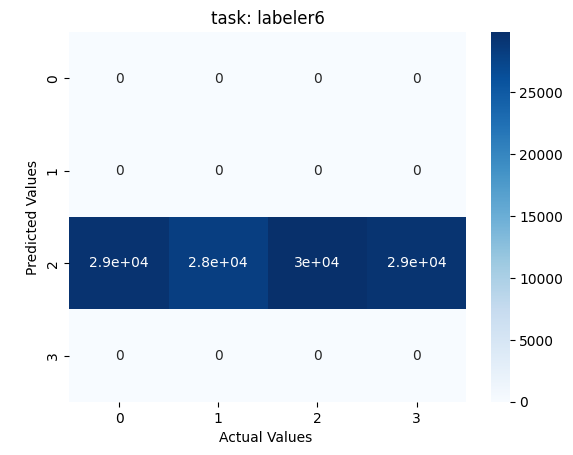

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns

print('task: ' + task)
print(classification_report(labels, predicted))
plt.clf()
ax = sns.heatmap(confusion_matrix(predicted, labels), annot=True, cmap='Blues')

ax.set_ylabel('\nPredicted Values')
ax.set_xlabel('Actual Values ')
ax.set_title('task: '+ str(task))